In [1]:
import numpy as np
import matplotlib.pyplot as plt

from eigenshuffle import eigenshuffle_eigh
from centrex_tlf import states, hamiltonian

plt.rcParams["font.size"] = 13


In [2]:
# generate states up to J=6
QN = states.generate_uncoupled_states_ground(Js=np.arange(7))

# generate the X hamiltonian terms
H = hamiltonian.generate_uncoupled_hamiltonian_X(QN)

# create a function outputting the hamiltonian as a function of E and B
Hfunc = hamiltonian.generate_uncoupled_hamiltonian_X_function(H)

# V/cm
Ez = np.linspace(0, 200, 201)

# generate the Hamiltonian, add a small field to make states
# non-degenerate
Hs = np.array([Hfunc(E=[0, 0, Ezi], B=[0, 0, 1e-3]) for Ezi in Ez])


In [7]:
e, v = np.linalg.eigh(Hs)

In [3]:
E, V = eigenshuffle_eigh(Hs)

In [4]:
QN_states = hamiltonian.matrix_to_states(V[0], QN)

In [5]:
# indices of the J=2, mJ=0 states focused by the lens
indices_J2_mJ0 = [
    idx for idx, s in enumerate(QN_states) if s.largest.J == 2 and s.largest.mJ == 0
]

# indices of the J=2 states
indices_J2 = [idx for idx, s in enumerate(QN_states) if s.largest.J == 2]


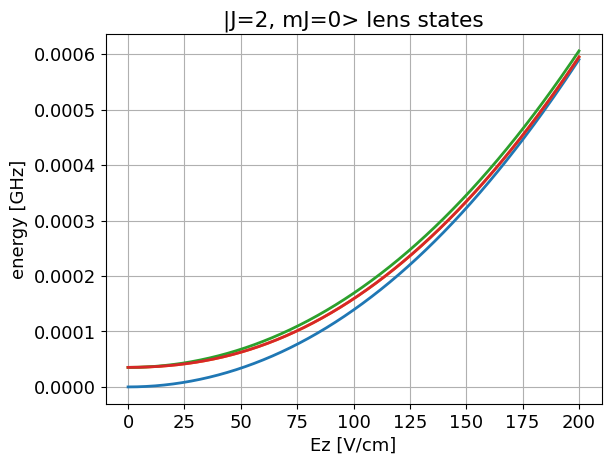

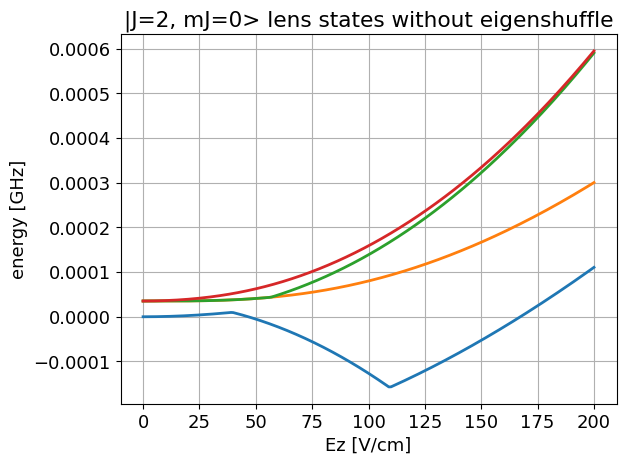

In [11]:
slice = np.s_[:]
energies = E[slice, indices_J2_mJ0]
energies -= energies[0, 0]

energies_original = e[slice, indices_J2_mJ0]
energies_original -= energies_original[0, 0]

fig, ax = plt.subplots()
ax.plot(Ez[slice], energies / (2 * np.pi * 1e9), lw=2)

ax.set_xlabel("Ez [V/cm]")
ax.set_ylabel("energy [GHz]")
ax.set_title("|J=2, mJ=0> lens states")
ax.grid()

fig, ax = plt.subplots()
ax.plot(Ez[slice], energies_original / (2 * np.pi * 1e9), lw=2)

ax.set_xlabel("Ez [V/cm]")
ax.set_ylabel("energy [GHz]")
ax.set_title("|J=2, mJ=0> lens states without eigenshuffle")
ax.grid()
